# 🛠 機械学習の基礎

機械学習の基礎を実践する。<br>

## 📚 手順概要
scikit-learn付属の乳がんのデータセットを使って、機械学習の教師あり（分類）を行う。
分析は、以下の手順で進めます。

1.   データセットの確認
2.   複数の機械学習法を用いた精度比較
3.   深層学習
4.   まとめ

### 1. データセットの確認

関連ライブラリの読み込み

In [1]:
# データ操作や解析に使う Python ライブラリ「pandas」を pd という名前で使えるようにするための宣言
import pandas as pd

# 数値計算ライブラリ NumPy を np という名前で使えるようにする
import numpy as np

scikit-learnが公開しているデータは、sklearn.datasetsのメソッドを使って読み込むことができる。今回は、以下のurlにあるファイルを読み込む。<br>
今回使用する乳がんのデータセットは、ウィスコンシン大学の乳がん診断データセット(Wisconsin Diagnostic Breast Cancer, WDBC)と呼ばれている。<br>
このデータセットは、乳がんの診断に関連する特徴量を持つ患者のデータを含んでいます。乳がんデータセットを読み込む。<br>

In [2]:
# データの読み込み
df_breast_cancer = pd.read_excel('https://github.com/iwata97/bioinfo/raw/refs/heads/main/breast_cancer_data.xlsx')

データの中身を確認してみる。

In [3]:
df_breast_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


今は、説明変数も目的変数も一緒になっている。<br>
目的変数をdf_targetに、説明変数をdf_dataに入れる。

In [4]:
df_target = pd.DataFrame(df_breast_cancer["target"], columns=["target"])
df_data = df_breast_cancer.drop(columns=["target"])

特徴量のデータ型の確認

In [5]:
# 各columnのデータ型を表示
print(f'{df_data.dtypes} \n')

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

データの中身を確認してみます。

In [6]:
df_data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


本データに含まれる特徴量は、いずれも連続値であることがわかります。
次に、統計量を確認します。

In [7]:
# データにおける、数値データの統計量を表示
display(df_data.describe())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


続いて、各特徴量の分布及び相関を確認します。

関連ライブラリの読み込み

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

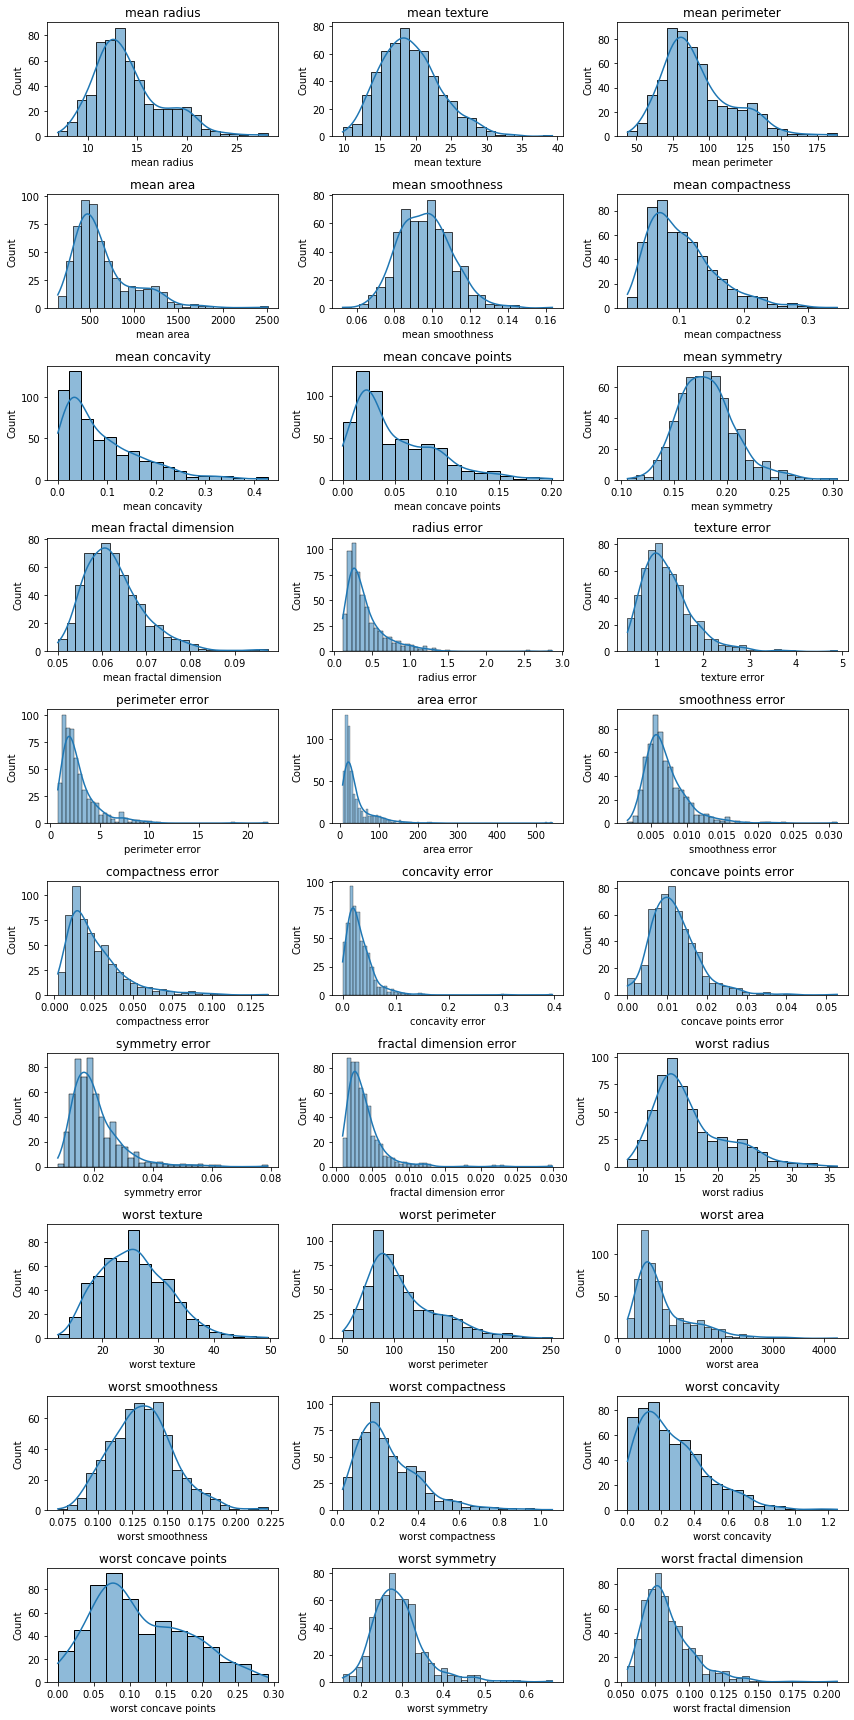

In [9]:
# 特徴量の名前の取得
feature_names = df_data.columns

# 特徴量の分布を可視化
plt.figure(figsize=(12, 24))
for i, feature in enumerate(feature_names):
    plt.subplot(10, 3, i + 1)
    sns.histplot(df_data[feature], kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

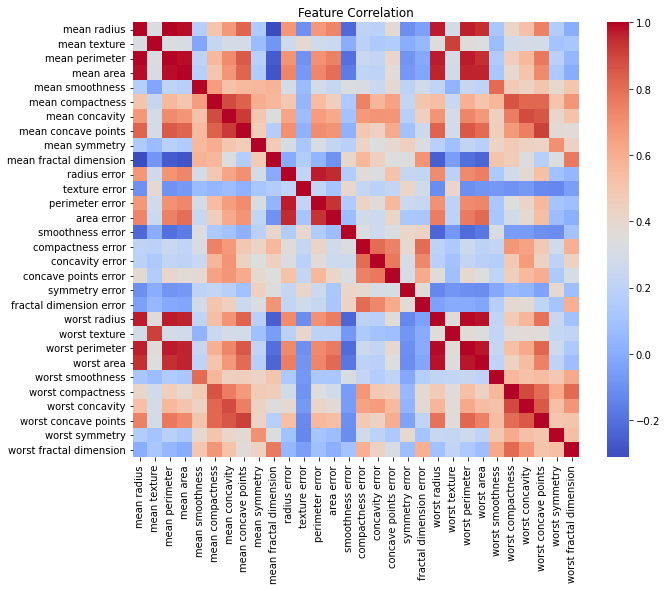

In [10]:
# 特徴量間の相関を可視化
plt.figure(figsize=(10, 8))
sns.heatmap(df_data.corr(), cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

## 3. 複数の機械学習法を用いた精度比較
ロジスティック回帰、サポートベクターマシン（SVM）、ランダムフォレスト、Light GBMのモデルの精度を比較します。



*   決定木：
*   サポートベクターマシン：2クラスの標本値と境界線の距離を基準に最適化
*   ランダムフォレスト：複数の決定木の多数決で分類を実施
*   Light GBM：





まず、データセットの説明変数と目的変数を分離する

In [11]:
# 説明変数と目的変数をそれぞれ読み込み
X = df_breast_cancer.drop('target', axis=1).values
y = df_breast_cancer['target'].values.ravel()

中身の確認と形状（データ数・特徴量数）の確認

In [12]:
print(X)
X.shape

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


(569, 30)

In [13]:
print(y)
y.shape

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

(569,)

データを学習データセットとテストデータセットに分割する

In [14]:
from sklearn.model_selection import train_test_split, cross_val_score

In [15]:
# データを訓練用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

形状（データ数・特徴量数）を確認

In [16]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(398, 30) (171, 30) (398,) (171,)


正規化

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
# 特徴量の正規化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ロジスティック回帰、サポートベクターマシン（SVM）、ランダムフォレスト、Light GBMのモデルの精度を比較します。

In [19]:
# モデル評価結果保存用リスト
results = []

ロジスティック回帰

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3, random_state=1)

#学習
tree.fit(X_train, y_train)

#log_reg = LogisticRegression(random_state=1)
#log_reg.fit(X_train, y_train)

# クロスバリデーション (5-fold)
#scores = cross_val_score(log_reg, X_train, y_train, cv=5)
scores = cross_val_score(tree, X_train, y_train, cv=5)

# 平均と標準誤差（標準偏差 / √n）
#log_reg_acc = scores.mean()
#log_reg_std_err = scores.std(ddof=1) / np.sqrt(len(scores))
tree_acc = scores.mean()
tree_std_err = scores.std(ddof=1) / np.sqrt(len(scores))

# 精度の保存
results.append({
    #"Model": "Logistic Regression",
    "Model": "Decision Tree",
    "Accuracy": tree_acc,
    "StdErr": tree_std_err
})

結果を見てみる

In [21]:
print(results)

[{'Model': 'Decision Tree', 'Accuracy': 0.944873417721519, 'StdErr': 0.012795791279762428}]


In [22]:
#pydotplusを用いて決定木を視覚化する
!pip install pydotplus

  Using cached pydotplus-2.0.2.tar.gz (278 kB)
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=bc2344d458ba28b7a7edab36375e5dedfc39d1f1dd65e18299165b0a80af4a7c
  Stored in directory: /Users/iwata/Library/Caches/pip/wheels/fe/cd/78/a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus


In [24]:
#pydotplus・graghvizで可視化
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree, filled=True, rounded = True, class_names=feature_names, feature_names=feature_names, out_file=None)

#グラフを出力
graph = graph_from_dot_data(dot_data)
graph.progs = {'dot': u"C:\\Program Files\\Graphviz\\bin\\dot.exe"}
graph.write_png("Iris_tree.png")

InvocationException: GraphViz's executable "C:\Program Files\Graphviz\bin\dot.exe" is not a file or doesn't exist

サポートベクターマシン（SVM）

In [1]:
from sklearn.svm import SVC

svc = SVC(kernel='linear', C=1, random_state=1)
svc.fit(X_train, y_train)

# クロスバリデーション (5-fold)
scores = cross_val_score(svc, X_train, y_train, cv=5)

# 平均と標準誤差（標準偏差 / √n）
svc_acc = scores.mean()
svc_std_err = scores.std(ddof=1) / np.sqrt(len(scores))

# 精度の保存
results.append({
    "Model": "Support Vector Machine",
    "Accuracy": svc_acc,
    "StdErr": svc_std_err
})

NameError: name 'X_train' is not defined

結果を見てみる

In [ ]:
print(results)

ランダムフォレスト

In [31]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier(random_state=1)
rand_forest.fit(X_train, y_train)

# クロスバリデーション (5-fold)
scores = cross_val_score(rand_forest, X_train, y_train, cv=5)

# 平均と標準誤差（標準偏差 / √n）
rand_forest_acc = scores.mean()
rand_forest_std_err = scores.std(ddof=1) / np.sqrt(len(scores))

# 精度の保存
results.append({
    "Model": "Random Forest",
    "Accuracy": rand_forest_acc,
    "StdErr": rand_forest_std_err
})

/var/folders/ff/pyyn22sn2kqc8j8xxs95jtyh0000gn/T/ipykernel_15757/2148758919.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand_forest.fit(X_train, y_train)
/Users/iwata/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/iwata/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/iwata/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A

結果を見てみる

In [32]:
print(results)

[{'Model': 'Logistic Regression', 'Accuracy': 0.969873417721519, 'StdErr': 0.006380644652517626}, {'Model': 'Support Vector Machine', 'Accuracy': 0.9798734177215189, 'StdErr': 0.007547882986248972}, {'Model': 'Random Forest', 'Accuracy': 0.9548101265822785, 'StdErr': 0.01086515044311759}]


LightGBM

In [24]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=1)
lgbm.fit(X_train, y_train)

# クロスバリデーション (5-fold)
scores = cross_val_score(lgbm, X_train, y_train, cv=5)

# 平均と標準誤差（標準偏差 / √n）
lgbm_acc = scores.mean()
lgbm_std_err = scores.std(ddof=1) / np.sqrt(len(scores))

# 精度の保存
results.append({
    "Model": "Light GBM",
    "Accuracy": lgbm_acc,
    "StdErr": lgbm_std_err
})

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 249, number of negative: 149
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000258 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3978
[LightGBM] [Info] Number of data points in the train set: 398, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.625628 -> initscore=0.513507
[LightGBM] [Info] Start training from score 0.513507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


精度の表示

In [25]:
# results を DataFrame に変換
df_results = pd.DataFrame(results)

# 表示
df_results

,Model,Accuracy,StdErr
0,Logistic Regression,0.969873,0.006381
1,Support Vector Machine,0.979873,0.007548
2,Random Forest,0.954810,0.010865
3,Light GBM,0.964842,0.007330


グラフを作成

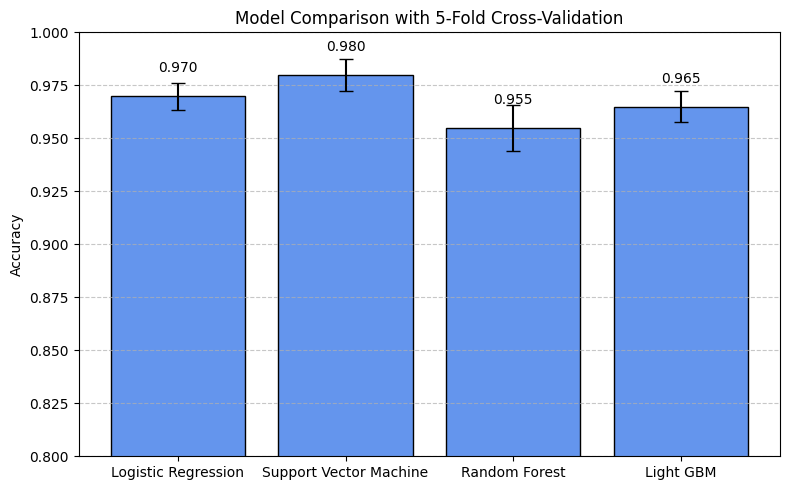

In [26]:
import matplotlib.pyplot as plt

# モデル名、精度、標準誤差をリストに変換
models = [d["Model"] for d in results]
accuracies = [d["Accuracy"] for d in results]
std_errors = [d.get("StdErr", 0) for d in results]  # StdErrがない場合は0

# グラフの描画
plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracies, yerr=std_errors, capsize=5, color='cornflowerblue', edgecolor='black')

# ラベルとスタイル
plt.ylabel("Accuracy")
plt.title("Model Comparison with 5-Fold Cross-Validation")
plt.ylim(0.8, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 値を棒の上に表示（任意）
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f"{acc:.3f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


# 4. 深層学習によるモデル構築と予測精度評価

In [27]:
import numpy as np
import pandas as pd

from keras import models
from keras import layers
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_breast_cancer

モデルの構築

In [28]:
model=models.Sequential()
model.add(layers.Dense(200,activation="relu",input_dim=30))
model.add(layers.Dense(100,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


モデルとしては、これでおしまい。
に、ここではしてますが、行を足せばもっと多層にできます。
models.Sequential() こいつが、
データの線形結合➡活性化関数➡次のニューロンへ
をやってくれるアルゴリズムです。
で、順番に各層で何やるかを決めてるんですが、
model.add(layers.Dense(200,activation=”relu”,input_dim=30))
最初のこれが入力層、
・200個のニューロン
・活性化関数はRELU
・入力データの次元は30
だよって決めてます。
model.add(layers.Dense(100,activation=”relu”))
ほんでこれが、中間層で、
・100個のニューロン
・活性化関数はRELU
として、出力層として
model.add(layers.Dense(1,activation=”sigmoid”))
1個の出力を、シグモイド関数でだしてね、2値だから。
としているわけです。

モデルの概要を見てみる

In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 200)            │         6,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,401 (103.13 KB)

 Trainable params: 26,401 (103.13 KB)

 Non-trainable params: 0 (0.00 B)

こんなですよと。
計26,401個のパラメータがあるよと、
各層でデータを線形結合する際の、各係数の数とその総和を教えてくれます。
モデルとしては、こうなんですが、
どうやって最適化していくの？とか、損失関数なんですか？とか、評価指標は何？
とうことを別途決めてあげないといけません。

In [30]:
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

最適化アルゴリズムはadam,
2値分類問題なので、損失関数は、バイナリーの交差エントロピー、
同じく2値分類問題なので、評価指標は正解率、
としています。
最適化アルゴリズムについては、ここがわかりやすかったです。

In [31]:
callbacks=[EarlyStopping(monitor="val_accuracy",patience=3)]

ほんでもって、検証データの正解率が、3回向上しなかったら学習終わって、を定義しといて、

In [32]:
model.fit(X_train,
                  y_train,
                  epochs=50,
                  batch_size=100,
                  verbose=1,
                  callbacks=callbacks)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4361 - loss: 0.7426
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9502 - loss: 0.4363
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9629 - loss: 0.2735
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9606 - loss: 0.1975
Epoch 5/50


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9699 - loss: 0.1356
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9759 - loss: 0.1058
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9813 - loss: 0.0918 
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9810 - loss: 0.0849
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9813 - loss: 0.0668
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9866 - loss: 0.0521
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9910 - loss: 0.0562
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9853 - loss: 0.0623
Epoch 13/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9880 - loss: 0.0423
Epoch 14/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9936 - loss: 0.0390
Epoch 15/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9900 - loss: 0.0503
Epoch 16/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9940 - loss: 0.0382
Epoch 1

こないして、学習です。
batch_size=100
これで、1回の学習で使うデータの数を、
epochs=50
これで学習の回数、を決めています。

ここで止まりました。
構築したモデルをテストデータに適用します

In [33]:
accuracy = model.evaluate(X_test,y_test)

# 精度の保存
results.append({
    "Model": "Deep Neural Network",
    "Accuracy": accuracy[1],
    "StdErr": 0
})

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9590 - loss: 0.0950  


In [34]:
# results を DataFrame に変換
df_results = pd.DataFrame(results)

# 表示
df_results

,Model,Accuracy,StdErr
0,Logistic Regression,0.969873,0.006381
1,Support Vector Machine,0.979873,0.007548
2,Random Forest,0.954810,0.010865
3,Light GBM,0.964842,0.007330
4,Neural Network,0.953216,0.000000


グラフにしてみる

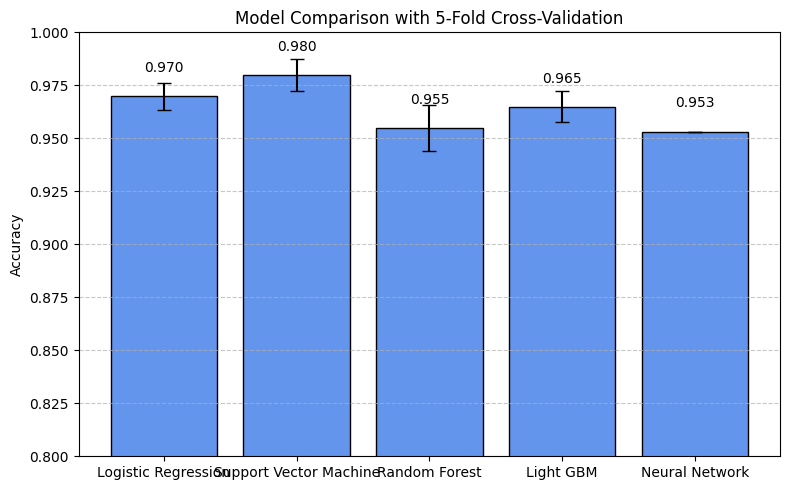

In [35]:
# モデル名、精度、標準誤差をリストに変換
models = [d["Model"] for d in results]
accuracies = [d["Accuracy"] for d in results]
std_errors = [d.get("StdErr", 0) for d in results]  # StdErrがない場合は0

# グラフの描画
plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracies, yerr=std_errors, capsize=5, color='cornflowerblue', edgecolor='black')

# ラベルとスタイル
plt.ylabel("Accuracy")
plt.title("Model Comparison with 5-Fold Cross-Validation")
plt.ylim(0.8, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 値を棒の上に表示（任意）
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f"{acc:.3f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


## 5. まとめ

アルゴリズムの中では、パラメータチューニングありのSVMが最も高い精度で乳がん患者を予測することができていました。

# 参考Webページ

### Pythonを用いた乳がんデータセットの分析と予測
https://qiita.com/mahomaho/items/5e0e3fcf7d4dc881d9cd

### Scikit-learn乳がん診断データセットで深層ニューラルネットワークしてみる
https://banga-heavy.com/scikit-learn%E4%B9%B3%E3%81%8C%E3%82%93%E8%A8%BA%E6%96%AD%E3%83%87%E3%83%BC%E3%82%BF%E3%82%BB%E3%83%83%E3%83%88%E3%81%A7%E3%83%8B%E3%83%A5%E3%83%BC%E3%83%A9%E3%83%AB%E3%83%8D%E3%83%83%E3%83%88/